# Pregunta 3:

In [1]:
import pandas as pd

df = pd.DataFrame(
    dict(x=[4, 5, 5, 6, 7, 7], y=[1, 1, 2, 7, 6, 7], c=[1, 1, 1, 2, 2, 2]),
    index=[*range(1, 7)],
)
df

,x,y,c
1,4,1,1
2,5,1,1
3,5,2,1
4,6,7,2
5,7,6,2
6,7,7,2


In [2]:
from scipy.spatial import distance_matrix
import numpy as np

point = np.array([[8, 4]])

## Distancias del Punto al resto de los puntos
pd.DataFrame(
    distance_matrix(point, df[["x", "y"]]), columns=[*range(1, 7)]
)

,1,2,3,4,5,6
0,5.0,4.242641,3.605551,3.605551,2.236068,3.162278


> Si k es 1, la distancia mas corta es 5, luego la predicción es 2.

> Si k = 3, las distancias son 5,6 y empate entre 3 y 4. Dado que 5 y 6 son 2, ya es mayoria por lo que el empate no importa, la predicción es 2.

In [3]:
from scipy.spatial.distance import cdist

pd.DataFrame(
    cdist(point, df[["x", "y"]], "mahalanobis"), columns=[*range(1, 7)]
)

,1,2,3,4,5,6
0,3.07265,2.182821,2.357716,3.24037,1.855041,2.338929


> Para k = 1 la distancia más pequeña es 5, luego la predicción es 2.


> Para k = 3, las 3 distancias más cortas son 5,2 y 6, luego la predicción también es 2.

## Pregunta 7:



In [4]:
conf_mat = np.array([[8, 2, 0], [4, 13, 13], [5, 12, 43]])


## Función para tomar una matriz de confusión y recrear las predicciones
def create_vectors(conf_mat):
    rows, cols = conf_mat.shape

    original_vals = np.empty((0, 2))
    for i in range(rows):
        for j in range(cols):
            interim = np.repeat([[i, j]], conf_mat[i, j], axis=0)
            original_vals = np.append(original_vals, interim, axis=0)

    y = original_vals[:, 0]
    y_pred = original_vals[:, 1]
    return y, y_pred


y, y_pred = create_vectors(conf_mat)

              precision    recall  f1-score   support

         0.0      0.471     0.800     0.593        10
         1.0      0.481     0.433     0.456        30
         2.0      0.768     0.717     0.741        60

    accuracy                          0.640       100
   macro avg      0.573     0.650     0.597       100
weighted avg      0.652     0.640     0.641       100



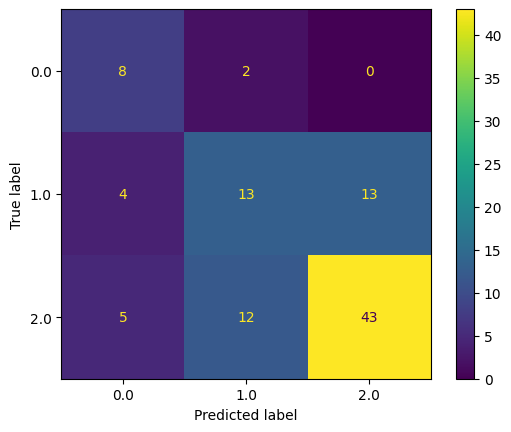

In [5]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Las predicciones recreadas generan esta matriz de confusión

# OJO: ELIMINÉ un 1 para que hayan 100 valores, si no es lo que se busca,
# se puede agregar el 1 en el objeto conf_mat de más arriba.

ConfusionMatrixDisplay.from_predictions(y, y_pred)

## Esdto entrega el Accuracy único como mandé en un notebook y Precision, Recall y F1 por clases 0,1 y 2.
print(classification_report(y, y_pred, digits=3))

# Pregunta 11

,A1,A2,A3,y
0,1,0,0,0
1,1,0,1,0
2,0,1,0,0
3,1,1,1,1
4,1,1,0,1


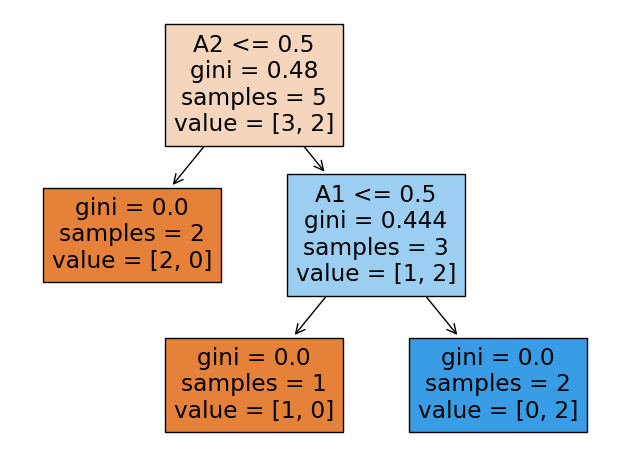

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.DataFrame(
    dict(
        A1=[1, 1, 0, 1, 1],
        A2=[0, 0, 1, 1, 1],
        A3=[0, 1, 0, 1, 0],
        y=[0, 0, 0, 1, 1],
    )
)
display(df)
X = df.drop(columns="y")
y = df.y
dt = DecisionTreeClassifier()
dt.fit(X, y)

plot_tree(dt, filled=True, feature_names=X.columns)
plt.tight_layout()

# Pregunta 12



> Dado que no se pide una predicción en particular, entrenar un Naive Bayes implica calcular todas las probabilidades apriori y condicionales requeridas por el modelo.

In [7]:
## A priori
df.y.value_counts(normalize=True)

y
0    0.6
1    0.4
Name: proportion, dtype: float64

In [8]:
## Condicionales A1
df.groupby("y").A1.value_counts(normalize=True)

y  A1
0  1     0.666667
   0     0.333333
1  1     1.000000
Name: proportion, dtype: float64

In [9]:
df.groupby("y").A2.value_counts(normalize=True)

y  A2
0  0     0.666667
   1     0.333333
1  1     1.000000
Name: proportion, dtype: float64

In [10]:
## Para la variable numerica A3, se requiere solo la media y desviacion estandar. El valor de likelihood dependerá del valor solicitado que tiene que ir dentro de la distribución normal...

df.A3.agg(["mean", "std"])

mean    0.400000
std     0.547723
Name: A3, dtype: float64

Ejemplo:

Calcular Una predicción con A1 = 1, A2=0 y A3 = 1.


Probabilidad que y sea 1:
$$P(y=1)*P(A1=1|y=1)*P(A2=0|y=1)*P(A3=1|y=1)$$



In [11]:
from scipy.stats import norm

# P(A3=1|y=1)
## Calcula la PDF de una normal, 1 es el valor a calcular, loc es la media y scale la std.
norm.pdf(1, loc=0.4, scale=0.547723)

0.39973559239090745

In [12]:
## Rescatando los valores de arriba sería:
0.4 * 1 * 0 * 0.3997

## Y así se puede ir calculando lo que se requiera, se entiende? Les dejo el resto como ejercicio.

0.0